In [1]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
#Give dataset path
train_path = r'small\train'
test_path = r'small\test'

Working with 80 images
Image examples: 
241.png


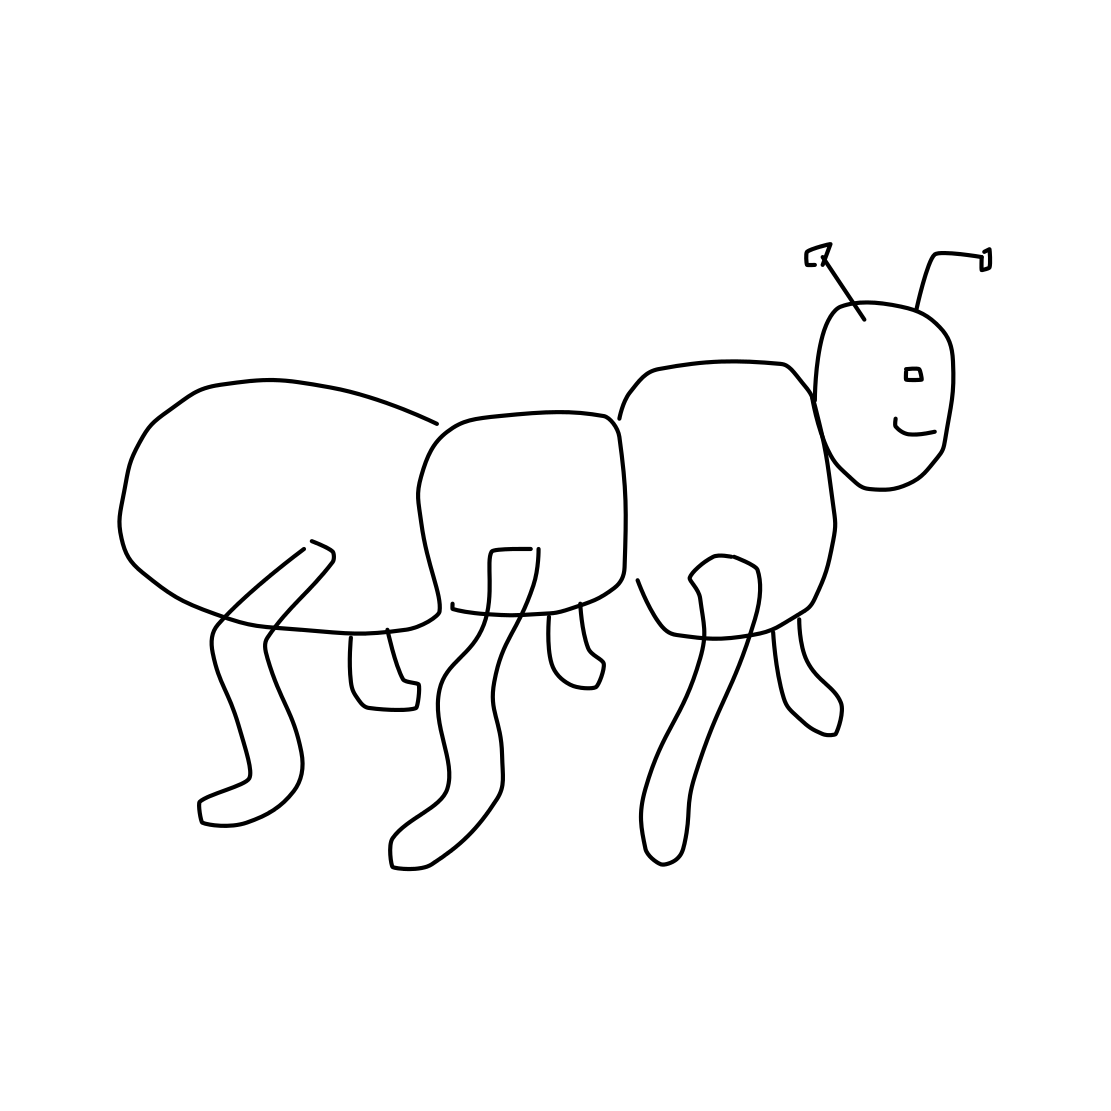

242.png


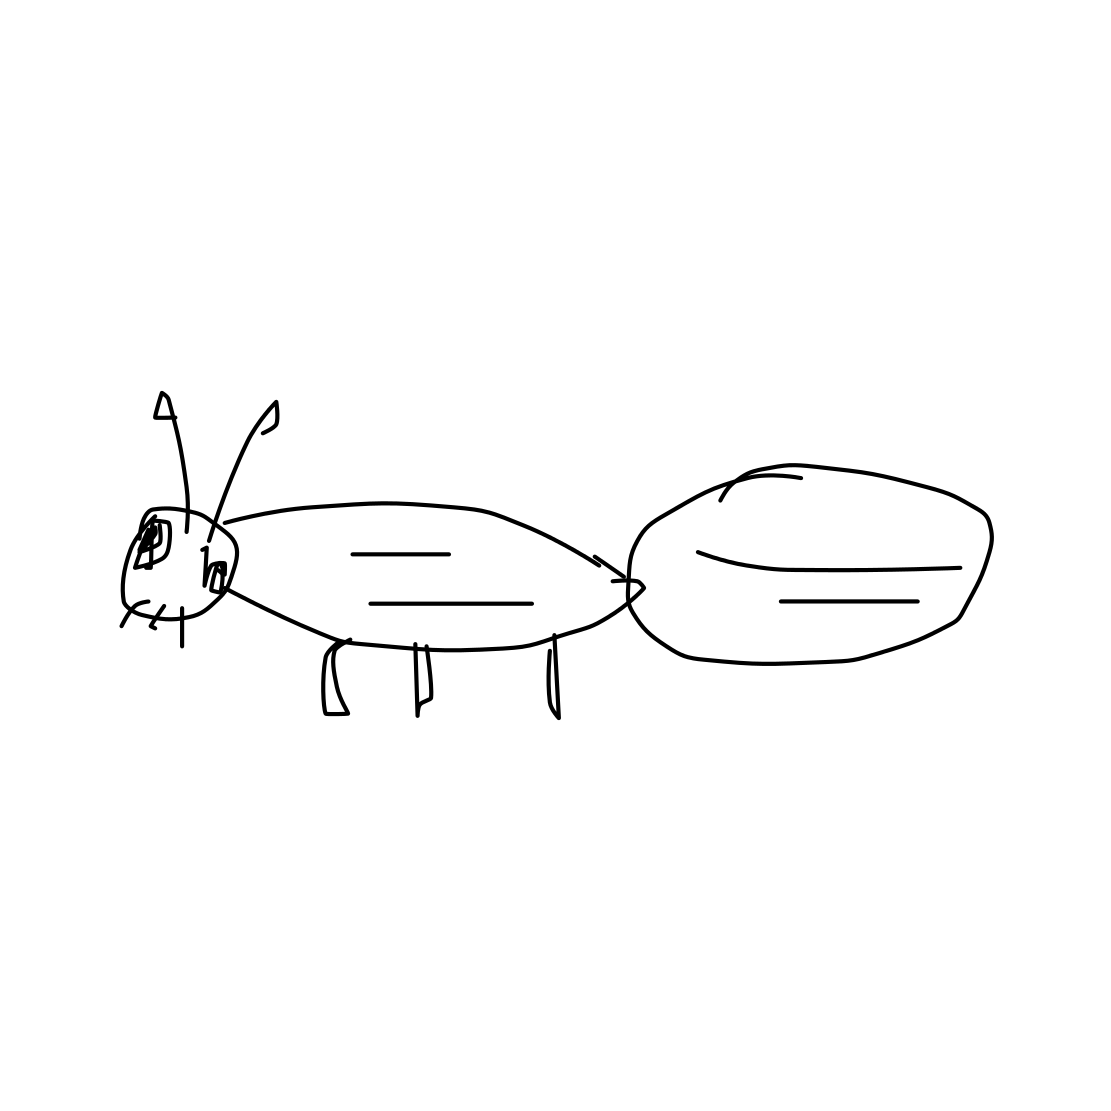

243.png


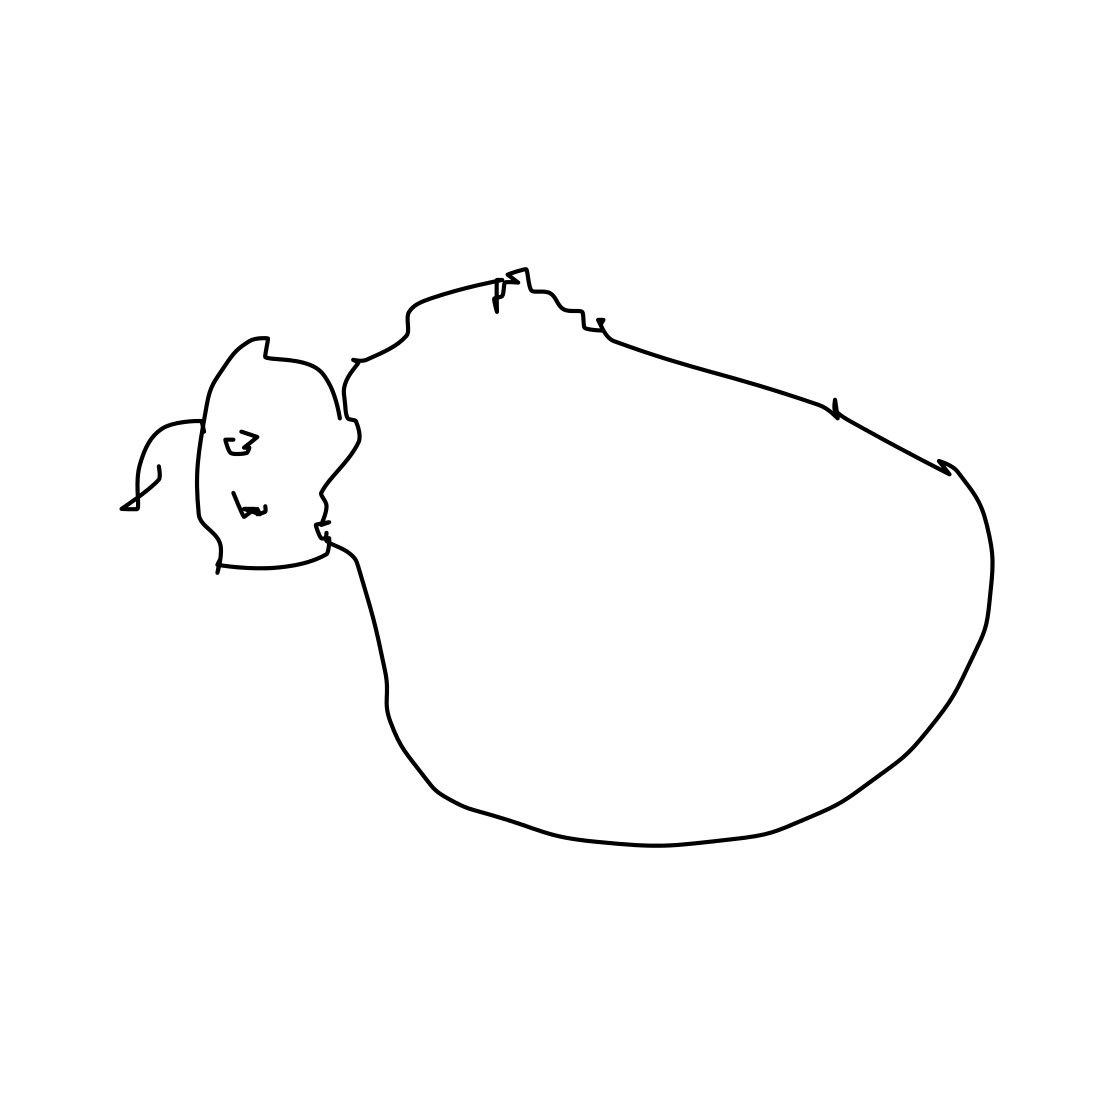

244.png


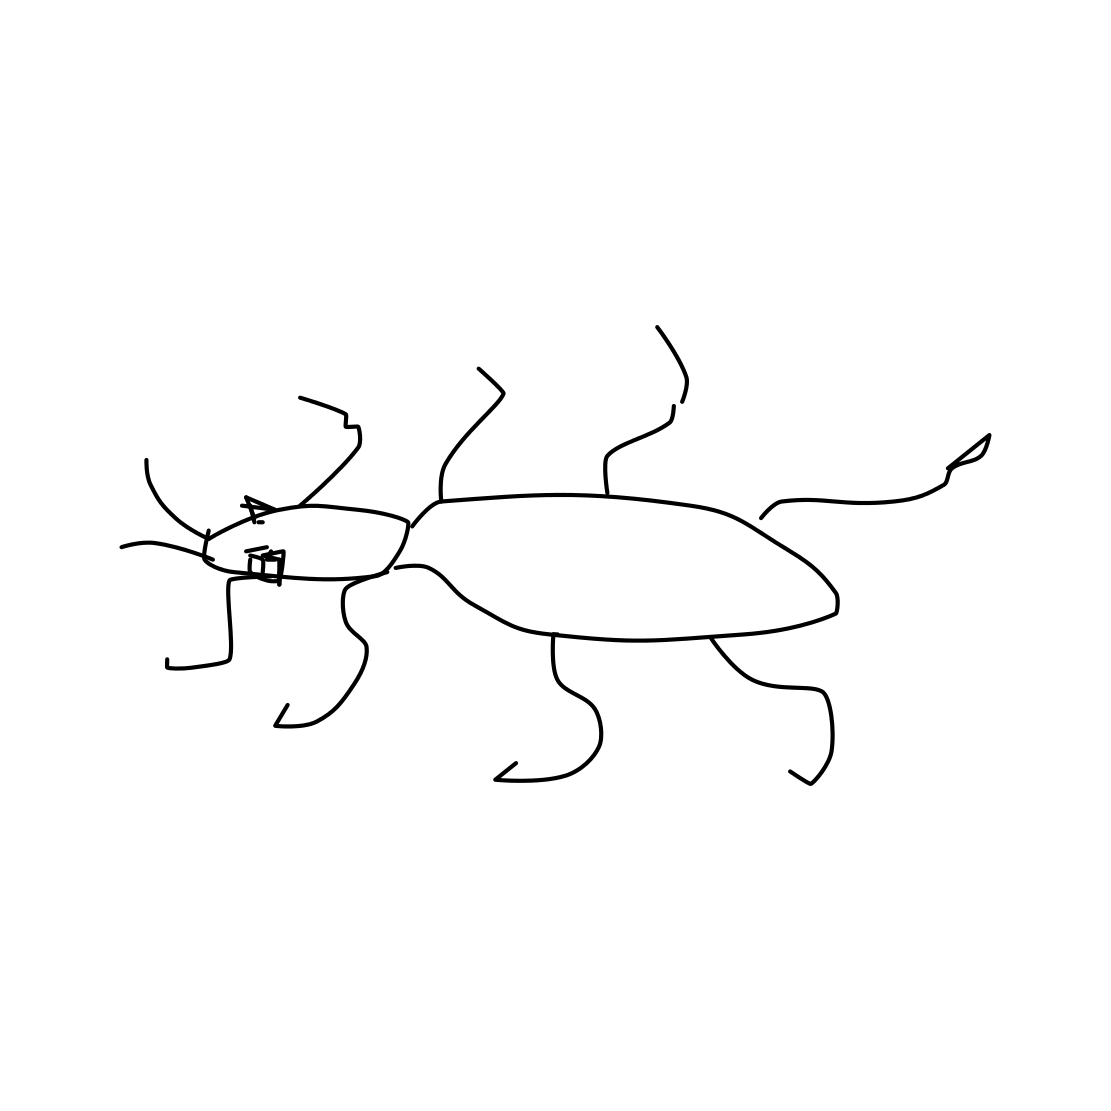

245.png


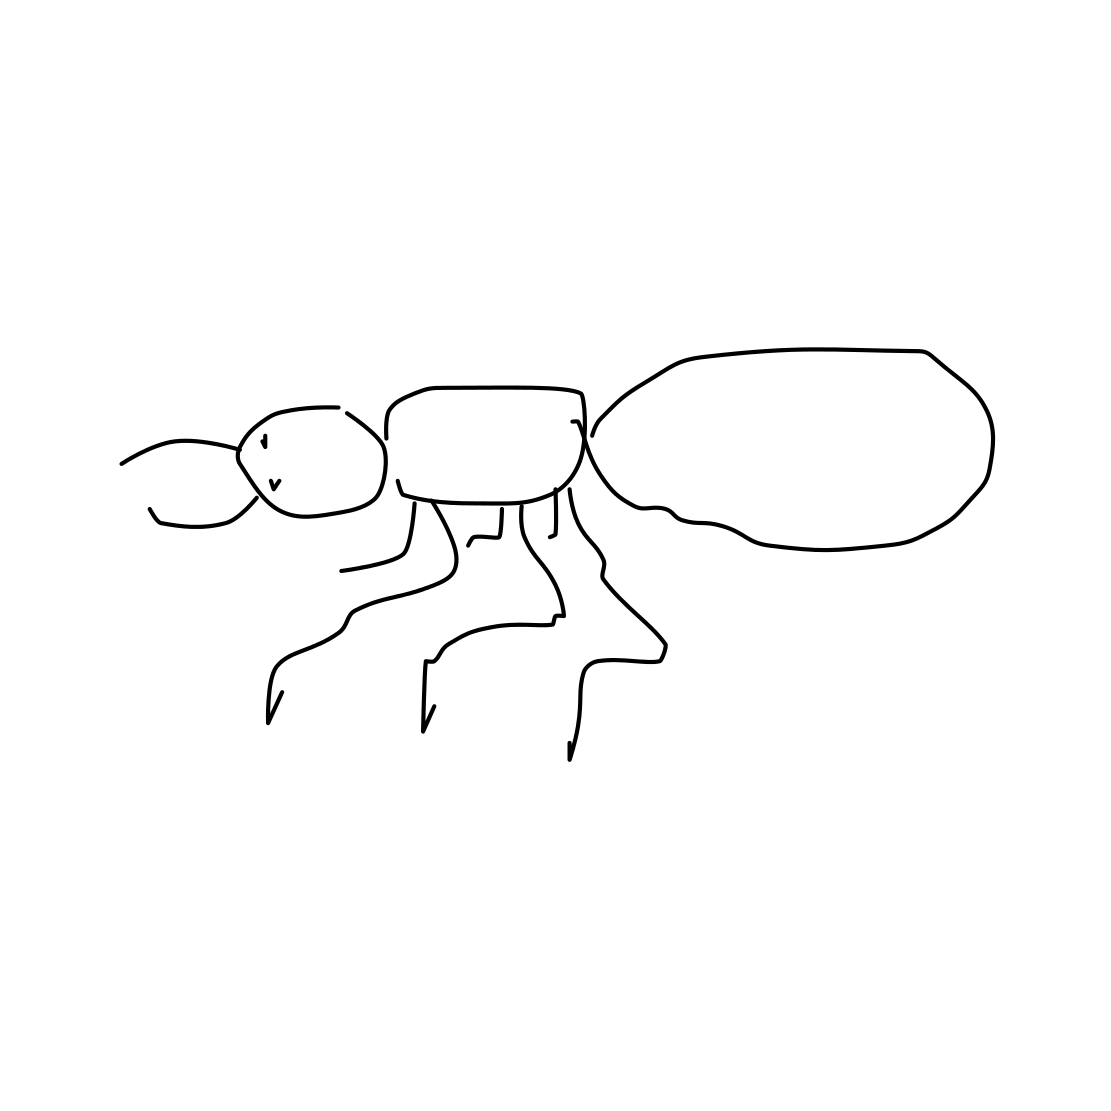

246.png


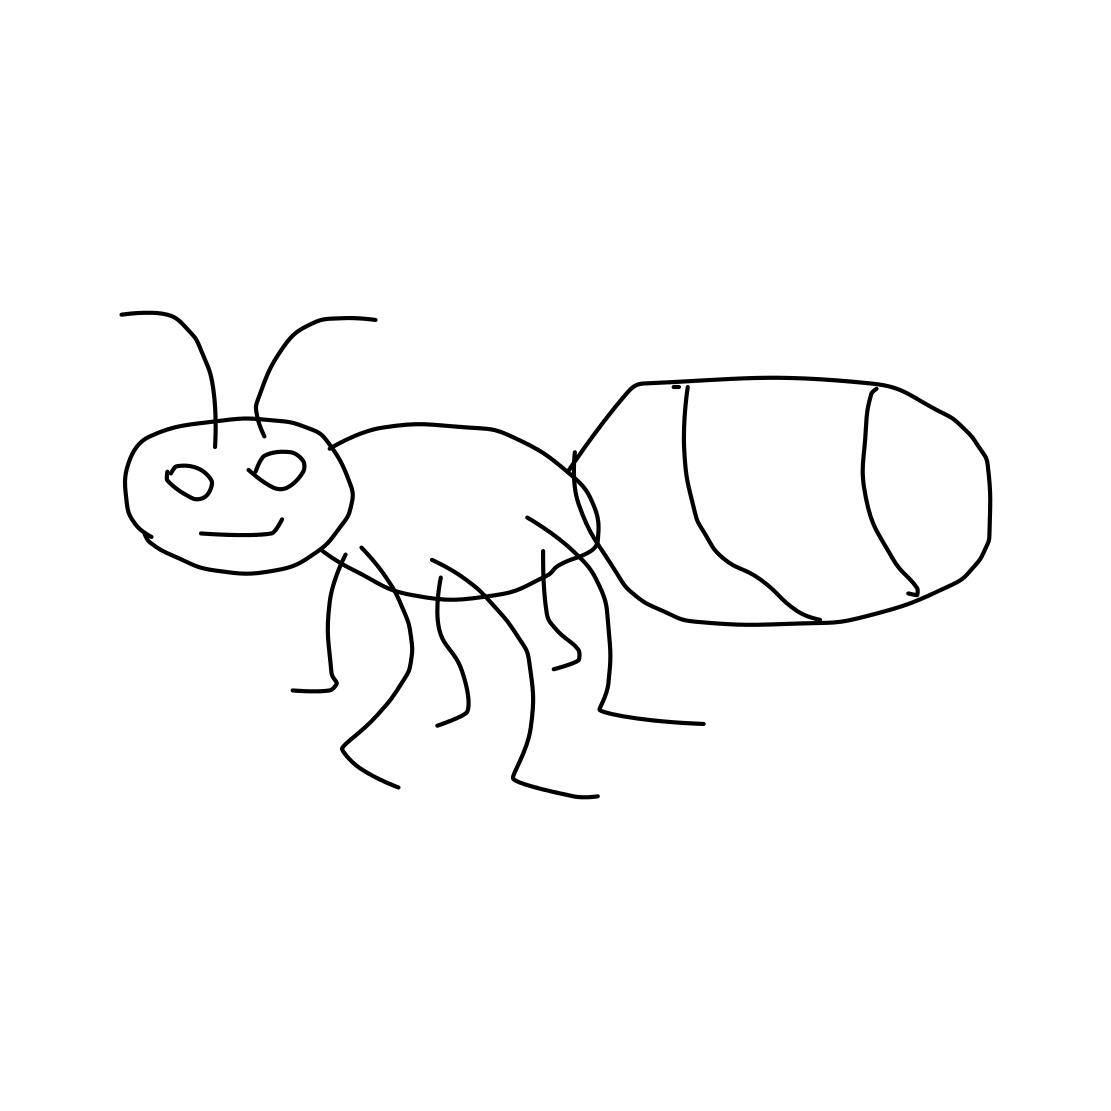

247.png


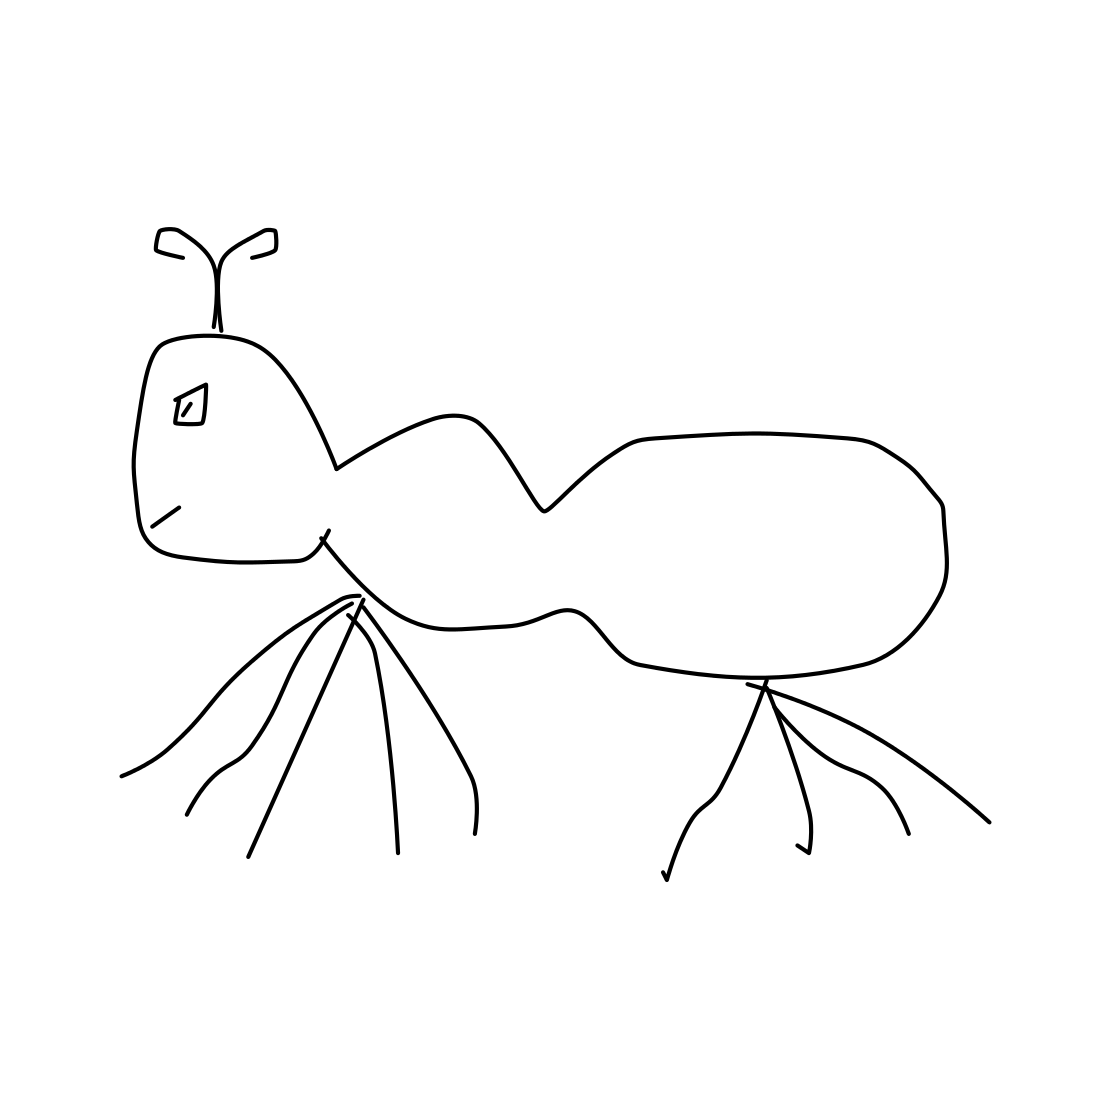

248.png


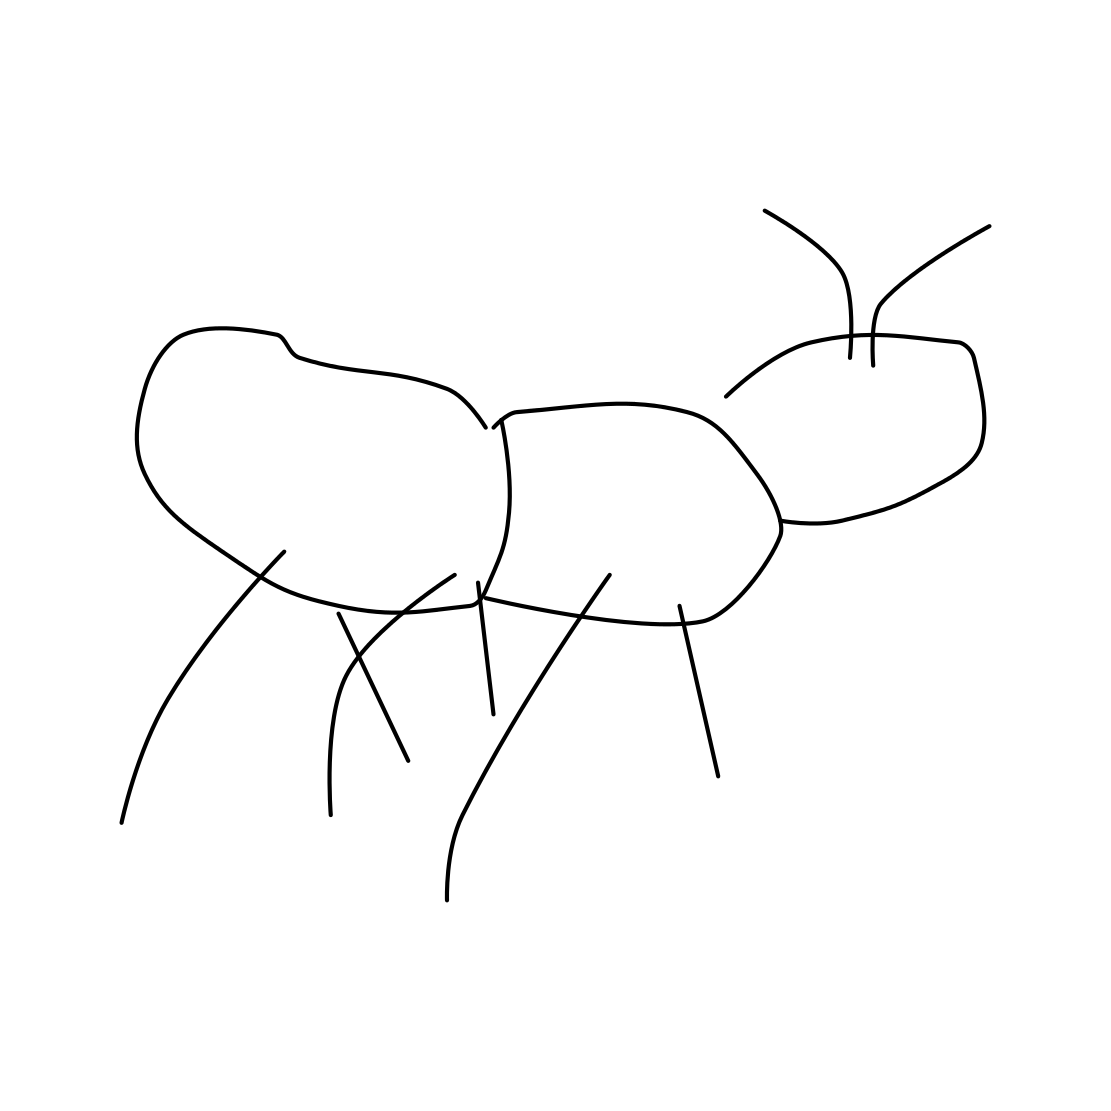

249.png


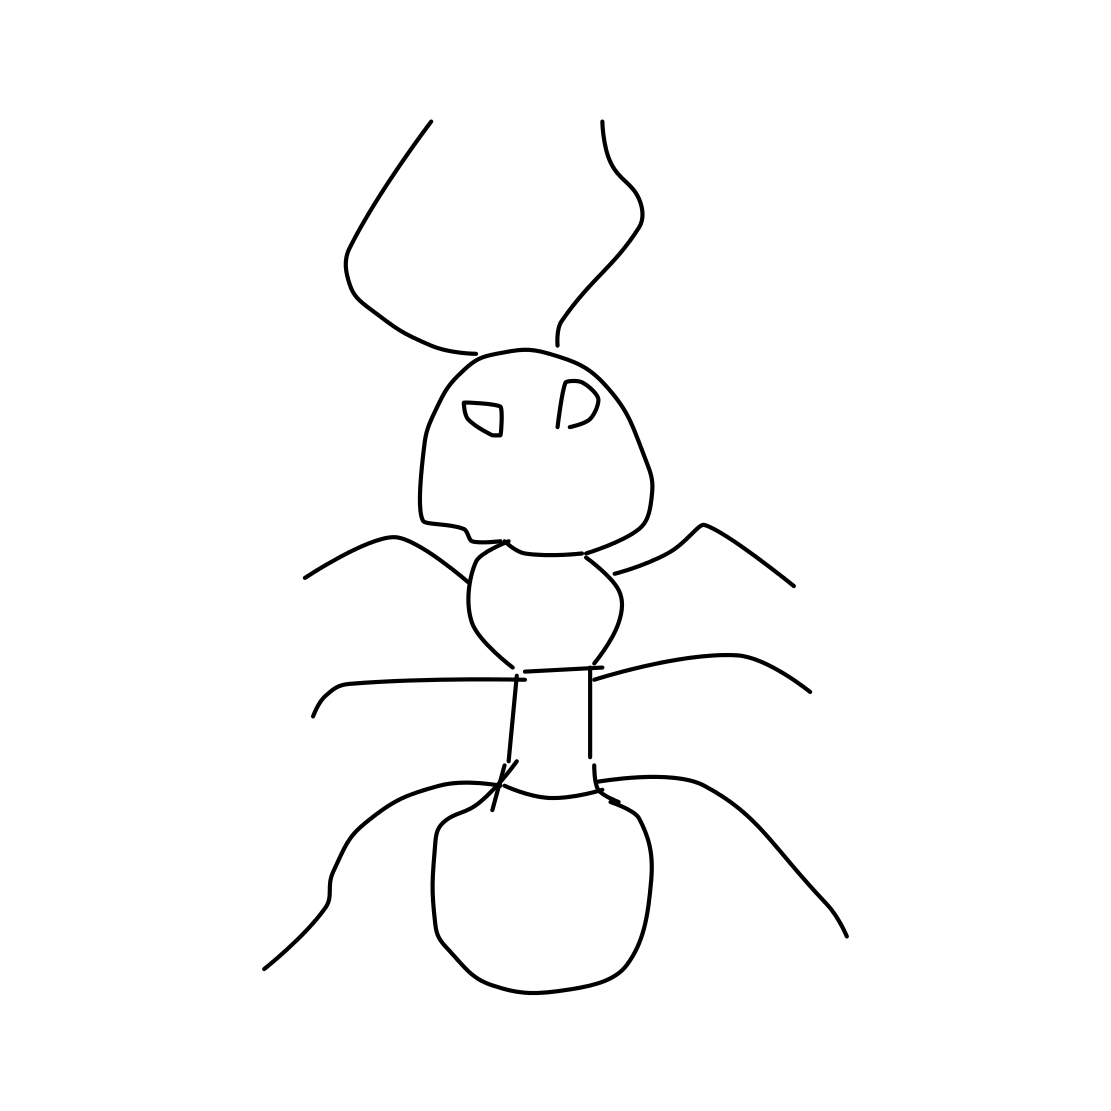

250.png


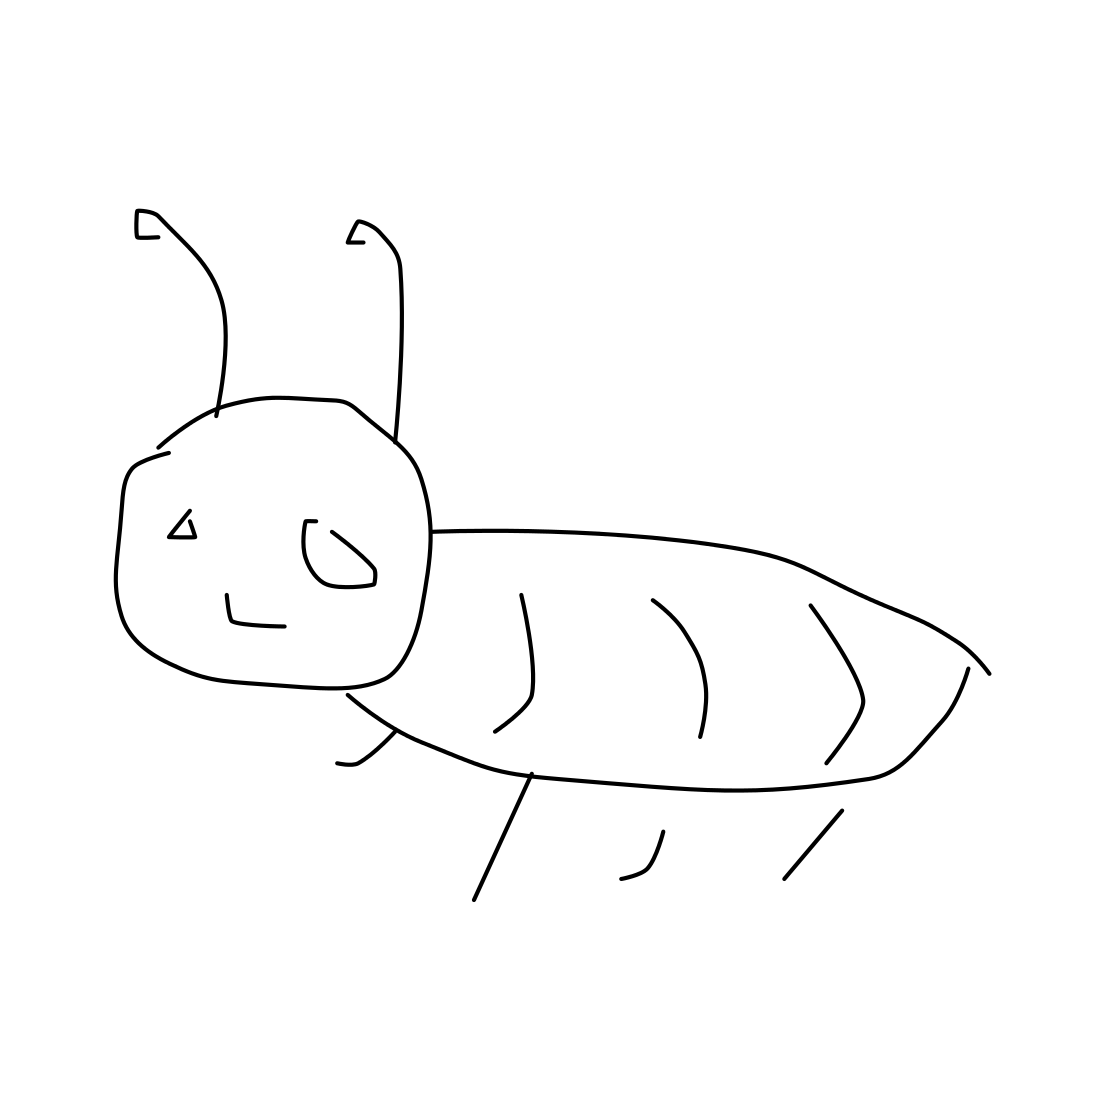

In [4]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/ant'


onlyantfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlyantfiles)))
print("Image examples: ")


for i in range(10):
    print(onlyantfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyantfiles[i], width=240, height=240))

In [5]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
for layer in vgg.layers:
  layer.trainable = False

In [24]:
folders = glob(r'small\train\*')
print(len(folders))

6


In [8]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [11]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [12]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 480 images belonging to 6 classes.


In [13]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 48 images belonging to 6 classes.


In [21]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='latest_model.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

C:\Users\Hi\AppData\Local\Temp/ipykernel_8056/2313446821.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/5

Epoch 1: val_loss improved from inf to 0.80914, saving model to latest_model.h5
5/5 - 126s - loss: 1.5178 - accuracy: 0.5437 - val_loss: 0.8091 - val_accuracy: 0.7500 - 126s/epoch - 25s/step
Epoch 2/5
5/5 - 96s - loss: 0.8932 - accuracy: 0.6875 - 96s/epoch - 19s/step
Epoch 3/5
5/5 - 93s - loss: 0.6648 - accuracy: 0.7500 - 93s/epoch - 19s/step
Epoch 4/5
5/5 - 90s - loss: 0.4717 - accuracy: 0.8188 - 90s/epoch - 18s/step
Epoch 5/5
5/5 - 83s - loss: 0.6121 - accuracy: 0.7812 - 83s/epoch - 17s/step
Training completed in time:  0:08:08.385896


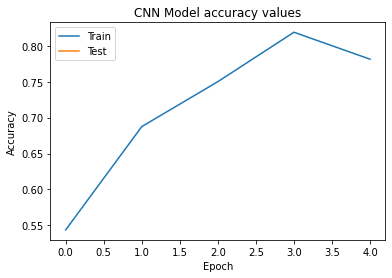

In [22]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import cv2
# load the model
# model = VGG16()
# load an image from file
# C:\Users\Hi\SKETCH\small2\test\airplane
a = cv2.imread(r'small2\test\airplane\74.png')
cv2.imshow("test",a)
image = load_img(r'small2\test\airplane\74.png', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
print(yhat)
classes = ["aeroplane","alarm","angel","ant","apple","beer"]
pred = np.argmax(yhat)
print("figure is of ",classes[pred])
cv2.waitKey(0)
cv2.destroyAllWindows()
# convert the probabilities to class labels
# label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
# label = label[0][0]
# print the classification
# print('%s (%.2f%%)' % (label[1], label[2]*100))

1/1 [==============================] - 0s 498ms/step
[[1.0000000e+00 0.0000000e+00 1.4974948e-37 0.0000000e+00 0.0000000e+00
  6.2432017e-38]]
figure is of  aeroplane
